In [1]:
#importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#loading dataset
titanic=pd.read_csv('titanic_seaborn.csv')

In [3]:
titanic

,survived,pclass,sex,age,age_mean,age_median,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,22.000000,22.0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,38.000000,38.0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,26.000000,26.0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,35.000000,35.0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,35.000000,35.0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,27.000000,27.0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,19.000000,19.0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,29.699118,28.0,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,26.000000,26.0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
#finding missing value
titanic.isnull()

,survived,pclass,sex,age,age_mean,age_median,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<AxesSubplot:>

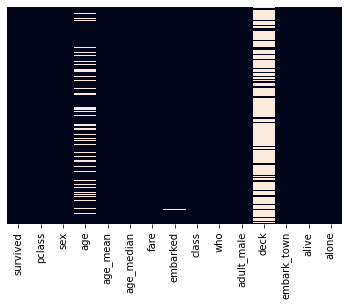

In [5]:
#using heatmap from seaborn library to see presence of null values in features
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

 As we can see that data is missing in 'age' column  which can be replaced with resonable replacement.
It looks like too much data is missing from column 'deck'.

<AxesSubplot:xlabel='survived', ylabel='count'>

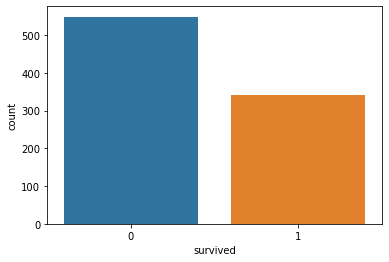

In [6]:
#visualizing no. of passangers who survived and  who do not survived
sns.countplot(x='survived',data=titanic)

<AxesSubplot:xlabel='survived', ylabel='count'>

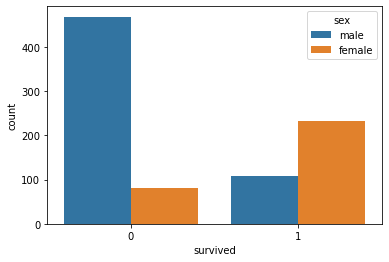

In [7]:
#checking total no. of male and female who survived and who do not
sns.countplot(x='survived',hue='sex',data=titanic)  #hue parameter divide on basis of sex

<AxesSubplot:xlabel='survived', ylabel='count'>

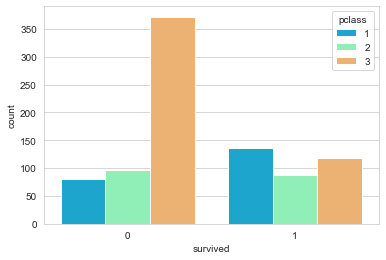

In [8]:
sns.set_style('whitegrid')
sns.countplot(x='survived',hue='pclass',data=titanic,palette='rainbow')

passanger with class1 survived more and passanger with class3 died more.

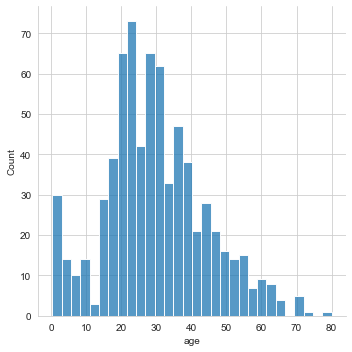

In [9]:
sns.displot(titanic['age'].dropna(),kde=False,bins=30)

we can conclude that people in age group 20 to 40 died more.

<AxesSubplot:>

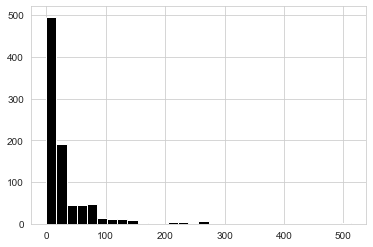

In [10]:
titanic['fare'].hist(color='black',bins=30)

# DATA CLEANING

Generally dropping missing value is not always good option instead of this we will try  to fil it with
its average.

<AxesSubplot:xlabel='pclass', ylabel='age'>

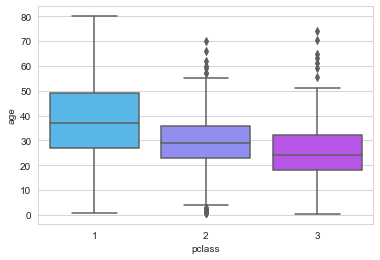

In [11]:
sns.boxplot(x='pclass',y='age',data=titanic,palette='cool')

we create function which will replace age of missing passanger with its average age in its respective class. 

In [12]:
def replace_age(c):
    age=c[0]
    pclass=c[1]
    
    if pd.isnull(age):
        if pclass==1:
            return 38
        elif pclass==2:
            return 29
        else:
            return 25
    else:
        return age

In [13]:
#applying above function on column age of titanic dataset
titanic['age']=titanic[['age','pclass']].apply(replace_age,axis=1)

<AxesSubplot:>

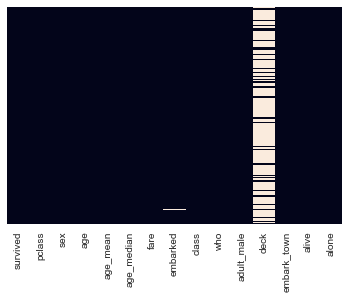

In [14]:
sns.heatmap(titanic.isnull(),yticklabels=False,cbar=False)

we can see that presence of null values from age column has gone.since deck column has lots of null values and it is not of prime importance hence drop it.

In [15]:
titanic.drop('deck',axis=1,inplace=True) #using inplace=True drop the column permanently

In [16]:
#checking weather column is actually drop or not.
titanic.head()

,survived,pclass,sex,age,age_mean,age_median,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,22.0,22.0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,38.0,38.0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,26.0,26.0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,35.0,35.0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,35.0,35.0,8.0500,S,Third,man,True,Southampton,no,True


#CONVERTING SOME CATEGORICAL FEATURES

In [17]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          891 non-null    float64
 4   age_mean     891 non-null    float64
 5   age_median   891 non-null    float64
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  embark_town  891 non-null    object 
 12  alive        891 non-null    object 
 13  alone        891 non-null    bool   
dtypes: bool(2), float64(4), int64(2), object(6)
memory usage: 85.4+ KB


In [18]:
Sex=pd.get_dummies(titanic['sex'],drop_first=True)
embark=pd.get_dummies(titanic['embarked'],drop_first=True)

In [19]:
#dropping columns age,embarked,who
titanic.drop(['sex','embarked','who'],axis=1,inplace=True)

In [20]:
titanic.head()

,survived,pclass,age,age_mean,age_median,fare,class,adult_male,embark_town,alive,alone
0,0,3,22.0,22.0,22.0,7.2500,Third,True,Southampton,no,False
1,1,1,38.0,38.0,38.0,71.2833,First,False,Cherbourg,yes,False
2,1,3,26.0,26.0,26.0,7.9250,Third,False,Southampton,yes,True
3,1,1,35.0,35.0,35.0,53.1000,First,False,Southampton,yes,False
4,0,3,35.0,35.0,35.0,8.0500,Third,True,Southampton,no,True


In [21]:
#adding columns Sex and embark
titanic=pd.concat([titanic,Sex,embark],axis=1)

In [22]:
titanic.head()

,survived,pclass,age,age_mean,age_median,fare,class,adult_male,embark_town,alive,alone,male,Q,S
0,0,3,22.0,22.0,22.0,7.2500,Third,True,Southampton,no,False,1,0,1
1,1,1,38.0,38.0,38.0,71.2833,First,False,Cherbourg,yes,False,0,0,0
2,1,3,26.0,26.0,26.0,7.9250,Third,False,Southampton,yes,True,0,0,1
3,1,1,35.0,35.0,35.0,53.1000,First,False,Southampton,yes,False,0,0,1
4,0,3,35.0,35.0,35.0,8.0500,Third,True,Southampton,no,True,1,0,1
